In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pytz import timezone
import urllib3
import warnings
warnings.filterwarnings('ignore')

# Load Data and get Meta Information

In [ ]:
raw_data_sessions= pd.read_csv('charging_sessions.csv' ,index_col=None)
raw_data_wheater= pd.read_csv('weather_burbank_airport.csv')

In [ ]:
raw_data_sessions.head(50)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 14:00:13+00:00,2020-01-02 23:00:41+00:00,2020-01-02 20:13:21+00:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil..."
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 14:09:14+00:00,2020-01-03 01:57:58+00:00,2020-01-03 00:59:21+00:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi..."
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 14:17:32+00:00,2020-01-03 00:44:54+00:00,2020-01-02 20:22:40+00:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil..."
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 14:25:38+00:00,2020-01-02 19:36:05+00:00,2020-01-02 18:38:39+00:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 14:27:40+00:00,2020-01-02 20:01:48+00:00,2020-01-02 19:17:46+00:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."


In [ ]:
raw_data_wheater.head(10)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
5,Burbank,2018-01-01 13:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
6,Burbank,2018-01-01 14:53:00,7.0,30.0,Partly Cloudy,992.08,0.0,0.0,7.0
7,Burbank,2018-01-01 15:53:00,8.0,34.0,Fair,992.41,0.0,0.0,8.0
8,Burbank,2018-01-01 16:53:00,12.0,34.0,Fair,993.39,0.0,0.0,12.0
9,Burbank,2018-01-01 17:53:00,16.0,34.0,Fair,994.05,0.0,0.0,16.0


In [ ]:
print(raw_data_wheater.info())
print(raw_data_sessions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null 

In [ ]:
print(raw_data_wheater.describe())
print(raw_data_sessions.describe())

        temperature   cloud_cover      pressure     windspeed  precipitation  \
count  29219.000000  29224.000000  29236.000000  29158.000000   29244.000000   
mean      17.885622     30.107993    986.879400      8.566568       0.059360   
std        6.454604      5.400388      3.607065      6.699889       0.471682   
min        2.000000      4.000000    971.000000      0.000000       0.000000   
25%       13.000000     26.000000    984.500000      6.000000       0.000000   
50%       17.000000     33.000000    986.480000      7.000000       0.000000   
75%       22.000000     34.000000    989.110000     13.000000       0.000000   
max       46.000000     47.000000    999.650000     57.000000      18.540000   

       felt_temperature  
count      29218.000000  
mean          17.731433  
std            6.321100  
min            0.000000  
25%           13.000000  
50%           17.000000  
75%           22.000000  
max           42.000000  
         Unnamed: 0  kWhDelivered        site

In [ ]:
raw_data_sessions.isnull().values.sum()


38614

# 0 Business Understanding

# 1. Data cleansing and preperation

## 1.1 Prepare Session Data

### Unpack 'userInputs' column

In [ ]:
raw_data_sessions['userInputs'].iloc[1]

"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"

In [ ]:
#convert String in a list of dictionaries
raw_data_sessions['userInputs']=raw_data_sessions['userInputs'].apply(lambda x : x if pd.isna(x)==True else eval(x))

In [ ]:
#create seperate column for each entry in dictionary
for key in list(raw_data_sessions.at[0, 'userInputs'][0].keys()):
    raw_data_sessions[key]=raw_data_sessions['userInputs'].apply(lambda x: x[0].get(key) if type(x)==type([]) else x)
#drop 'userInputs' column
raw_data_sessions.drop(['userInputs'], axis=1, inplace=True)
raw_data_sessions.head(2)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,250.0,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,280.0,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"


### Deal with missing 'doneChargingTime'

For utilization analysis in terms of total kWh Delivered missing 'doneChargingTime' can be neglected because it does not influence kWhDelivered. However, it is in the interest of the owner to know how many cars are done Charging but stay connected.

* For KPI analysis discard all null values

* For Cluster analysis compare both/ discard all null values

* For utilization prediction neglect column due to no influence on kWhDelivered

### Dealing with missing 'User information'

* For cluster analysis divide set into 'users' and 'guests'
* For utilization prediction we ignore the column

### Convert String to DateTime format

In [ ]:
raw_data_sessions['connectionTime']=pd.to_datetime(raw_data_sessions['connectionTime']).dt.tz_localize(None)
raw_data_sessions['disconnectTime']=pd.to_datetime(raw_data_sessions['disconnectTime']).dt.tz_localize(None)
raw_data_sessions['doneChargingTime']=pd.to_datetime(raw_data_sessions['doneChargingTime']).dt.tz_localize(None)
raw_data_sessions['modifiedAt']=pd.to_datetime(raw_data_sessions['modifiedAt']).dt.tz_localize(None)
raw_data_sessions['requestedDeparture']=pd.to_datetime(raw_data_sessions['requestedDeparture']).dt.tz_localize(None)

### Scan for duplicates

In [ ]:
dublicates=raw_data_sessions['id']
raw_data_sessions[dublicates.isin(dublicates[dublicates.duplicated()])].sort_values("id")

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
5573,0,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46,2019-07-02 02:34:56,2019-07-02 01:46:09,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,200.0,4.00,20.0,90.0,2019-07-02 00:32:53,True,2019-07-02 02:02:46
65037,8675,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46,2019-07-02 02:34:56,2019-07-02 01:46:09,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,200.0,4.00,20.0,90.0,2019-07-02 00:32:53,True,2019-07-02 02:02:46
65038,8676,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28,2019-07-02 16:01:01,2019-07-02 16:01:38,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,273.0,19.11,70.0,332.0,2019-07-02 12:18:12,True,2019-07-02 17:47:28
5574,1,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28,2019-07-02 16:01:01,2019-07-02 16:01:38,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,273.0,19.11,70.0,332.0,2019-07-02 12:18:12,True,2019-07-02 17:47:28
5575,2,5d310f54f9af8b52adda3e21,2019-07-02 12:42:49,2019-07-02 19:34:19,2019-07-02 16:21:21,13.734,1_1_178_828_2019-07-02 12:42:48.733464,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,400.0,20.00,50.0,186.0,2019-07-02 12:43:19,True,2019-07-02 15:48:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,1410,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40,2019-07-31 22:44:22,2019-07-31 22:45:21,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,333.0,19.98,60.0,184.0,2019-07-31 19:04:57,True,2019-07-31 22:08:40
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47,2019-08-01 00:34:51,2019-07-31 21:25:30,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,275.0,22.00,80.0,60.0,2019-07-31 19:20:10,True,2019-07-31 20:19:47
6984,1411,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47,2019-08-01 00:34:51,2019-07-31 21:25:30,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,275.0,22.00,80.0,60.0,2019-07-31 19:20:10,True,2019-07-31 20:19:47
6985,1412,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47,2019-07-31 22:00:04,2019-07-31 20:51:34,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [ ]:
# drop dublicates
raw_data_sessions.drop_duplicates(subset='id', inplace=True)

### Scan for outliers

In [ ]:
# Using Rule of thumb: outside of 3 x the standard deivation
mean=raw_data_sessions['kWhDelivered'].mean()
std=raw_data_sessions['kWhDelivered'].std()
z=3*std+ mean

raw_data_sessions[raw_data_sessions['kWhDelivered']>z].sort_values('kWhDelivered', ascending=False)
#108.797242 doesn't seem to be a real outlier since some EV have a battery capacity > 100kWh

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
18641,4338,610c829df9af8b0580e98730,2021-07-20 22:16:54,2021-07-21 15:18:03,2021-07-21 15:19:00,108.797242,1_1_193_829_2021-07-20 18:27:33.500144,1,AG-1F03,1-1-193-829,America/Los_Angeles,378.0,258.0,35.088,136.0,480.0,2021-07-20 22:16:53,True,2021-07-21 06:16:53
18643,4340,610c829df9af8b0580e98732,2021-07-20 22:16:56,2021-07-21 15:18:16,2021-07-21 15:19:13,89.362732,1_1_194_818_2021-07-20 13:54:47.875453,1,AG-1F14,1-1-194-818,America/Los_Angeles,481.0,360.0,86.400,240.0,778.0,2021-07-20 22:16:55,True,2021-07-21 11:14:55
47536,1451,60de5ec3f9af8b3d00c4a9f1,2021-06-15 01:16:46,2021-06-15 03:10:04,NaT,77.700000,2_39_81_4550_2021-06-15 01:16:35.196863,2,11900388,2-39-81-4550,America/Los_Angeles,11017.0,434.0,108.500,250.0,786.0,2021-06-15 01:16:45,True,2021-06-15 14:22:46
48256,2171,611da6e3f9af8b20759dac77,2021-08-03 00:43:11,2021-08-03 02:36:45,NaT,75.696000,2_39_81_4550_2021-08-03 00:42:52.282772,2,11900388,2-39-81-4550,America/Los_Angeles,11017.0,434.0,108.500,250.0,786.0,2021-08-03 00:43:10,True,2021-08-03 13:49:11
20986,807,5c60d02df9af8b149d7da395,2019-01-26 03:40:20,2019-01-26 22:36:03,2019-01-26 14:45:12,75.528000,2_39_91_437_2019-01-26 03:40:20.383123,2,CA-317,2-39-91-437,America/Los_Angeles,1225.0,600.0,180.000,300.0,720.0,2019-01-26 03:40:23,True,2019-01-26 15:40:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54490,2903,5c366a05f9af8b4639a8ec0f,2018-11-12 15:06:40,2018-11-13 00:57:22,2018-11-13 00:57:10,42.604000,1_1_179_810_2018-11-12 15:06:39.835675,1,AG-3F30,1-1-179-810,America/Los_Angeles,826.0,250.0,50.000,200.0,597.0,2018-11-12 15:06:59,True,2018-11-13 01:03:40
4742,4742,5f260919f9af8b5396fb302a,2020-07-16 14:06:23,2020-07-16 21:15:47,2020-07-16 20:49:07,42.601000,1_1_179_815_2020-07-16 14:06:22.777121,1,AG-3F33,1-1-179-815,America/Los_Angeles,2678.0,289.0,43.350,150.0,576.0,2020-07-16 14:06:29,True,2020-07-16 23:42:23
1923,1923,5e571be6f9af8b7a25458796,2020-02-10 15:07:59,2020-02-11 02:07:47,2020-02-10 22:14:31,42.599000,1_1_194_821_2020-02-10 15:07:59.015762,1,AG-1F13,1-1-194-821,America/Los_Angeles,335.0,231.0,46.200,200.0,515.0,2020-02-10 15:08:25,True,2020-02-10 23:42:59
57824,1462,5c7eeab9f9af8b1308c33c38,2019-02-04 15:50:41,2019-02-05 01:24:43,2019-02-04 22:42:02,42.589000,1_1_191_792_2019-02-04 15:50:41.418127,1,AG-4F37,1-1-191-792,America/Los_Angeles,474.0,441.0,57.330,130.0,91.0,2019-02-04 15:50:44,True,2019-02-04 17:21:41


In [ ]:
raw_data_sessions[raw_data_sessions['kWhDelivered']<1].sort_values('kWhDelivered')
# Values seem to realistic => charge car while doing shopping

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
49023,2938,614fbf18f9af8b6e51664229,2021-09-10 02:53:50,2021-09-10 03:11:24,2021-09-10 03:11:18,0.501,2_39_89_25_2021-09-10 02:53:50.256699,2,CA-315,2-39-89-25,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
33223,2430,5bc92083f9af8b0dc677bff2,2018-06-07 15:52:34,2018-06-07 16:10:58,2018-06-07 16:10:54,0.501,2_39_78_360_2018-06-07 15:52:34.266211,2,CA-322,2-39-78-360,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
44947,14154,5c2e894cf9af8b13dab078ef,2018-11-26 03:52:01,2018-11-26 04:10:32,2018-11-26 04:10:28,0.501,2_39_125_21_2018-11-26 03:52:01.050147,2,CA-311,2-39-125-21,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
18059,3756,60ef81a9f9af8b5782e8c389,2021-06-28 15:08:06,2021-06-28 17:22:44,2021-06-28 15:29:49,0.502,1_1_178_817_2021-06-28 15:08:06.166102,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
52470,883,5c3662e1f9af8b4639a8e42b,2018-10-01 13:33:11,2018-10-01 13:42:42,NaT,0.502,1_1_191_802_2018-10-01 13:33:11.047241,1,AG-4F44,1-1-191-802,America/Los_Angeles,581.0,250.0,12.5,50.0,568.0,2018-10-01 13:37:32,True,2018-10-01 23:01:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20751,572,5c5795b2f9af8b78a3bcf146,2019-01-18 20:56:25,2019-01-19 02:05:14,2019-01-19 01:53:01,0.999,2_39_90_26_2019-01-18 20:56:24.820696,2,CA-316,2-39-90-26,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
41471,10678,5bc94256f9af8b0dc677e02a,2018-10-01 00:34:36,2018-10-01 00:43:52,2018-10-01 00:44:50,0.999,2_39_89_25_2018-10-01 00:34:35.777252,2,CA-315,2-39-89-25,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
7618,2045,5d686e3bf9af8b028d78893a,2019-08-14 00:19:20,2019-08-14 00:56:07,2019-08-14 00:57:06,0.999,1_1_193_816_2019-08-14 00:19:19.701894,1,AG-1F05,1-1-193-816,America/Los_Angeles,448.0,200.0,8.0,40.0,572.0,2019-08-14 00:20:05,True,2019-08-14 09:51:20
672,672,5e34d4f7f9af8b3c2f4e4367,2020-01-15 16:26:35,2020-01-15 23:41:23,2020-01-15 17:11:39,0.999,1_1_191_782_2020-01-15 16:26:24.928324,1,AG-4F50,1-1-191-782,America/Los_Angeles,1472.0,400.0,8.0,20.0,60.0,2020-01-15 16:26:35,True,2020-01-15 17:26:35


## disconnectTime < doneChargingTime ?

In [ ]:
raw_data_sessions.loc[(raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]) ]["id"].count()


4387

In [ ]:
raw_data_sessions.drop(raw_data_sessions[raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]].index, inplace=True)

In [ ]:
raw_data_sessions.loc[(raw_data_sessions["disconnectTime"]<raw_data_sessions["doneChargingTime"]) ]["id"].count()


0

## 1.2 Prepare Wheater Data

In [ ]:
print(raw_data_wheater[pd.isnull(raw_data_wheater['temperature'])==True])

          city            timestamp  temperature  cloud_cover  \
3752   Burbank  2018-05-21 17:35:00          NaN         20.0   
8443   Burbank  2018-11-17 14:53:00          NaN         20.0   
16982  Burbank  2019-09-23 06:53:00          NaN         33.0   
16985  Burbank  2019-09-23 08:53:00          NaN         33.0   
16988  Burbank  2019-09-23 10:53:00          NaN         33.0   
18138  Burbank  2019-11-07 08:53:00          NaN         20.0   
18252  Burbank  2019-11-11 07:23:00          NaN         20.0   
18322  Burbank  2019-11-13 11:53:00          NaN         20.0   
18323  Burbank  2019-11-13 12:41:00          NaN         20.0   
19195  Burbank  2019-12-14 10:45:00          NaN         20.0   
19196  Burbank  2019-12-14 10:53:00          NaN         20.0   
19197  Burbank  2019-12-14 11:53:00          NaN         20.0   
26063  Burbank  2020-08-29 14:53:00          NaN         34.0   
27397  Burbank  2020-10-20 10:29:00          NaN         26.0   
27398  Burbank  2020-10-2

### Dealing with missing values

We decided to delete all rows with null-values because of the small amount of rows

In [ ]:
raw_data_wheater.dropna(axis=0, inplace=True)
print(raw_data_wheater.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29105 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29105 non-null  object 
 1   timestamp                29105 non-null  object 
 2   temperature              29105 non-null  float64
 3   cloud_cover              29105 non-null  float64
 4   cloud_cover_description  29105 non-null  object 
 5   pressure                 29105 non-null  float64
 6   windspeed                29105 non-null  float64
 7   precipitation            29105 non-null  float64
 8   felt_temperature         29105 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.2+ MB
None


### Checking for duplicates

In [ ]:
#no duplicates found
raw_data_wheater['timestamp'].unique()

array(['2018-01-01 08:53:00', '2018-01-01 09:53:00',
       '2018-01-01 10:53:00', ..., '2021-01-01 05:53:00',
       '2021-01-01 06:53:00', '2021-01-01 07:53:00'], dtype=object)

### Convert String to DateTime format

In [ ]:
raw_data_wheater['timestamp']=pd.to_datetime(raw_data_wheater['timestamp']).dt.tz_localize(None)

### Scan for outliers

In [ ]:
def print_outliers(string_arr):
    for element in string_arr:
        mean=raw_data_wheater[element].mean()
        std=raw_data_wheater[element].std()
        z1=3* std + mean
        z2= mean - 3* std
        print(element)
        df=raw_data_wheater[[element]]
        print(df[df[element]<z2].sort_values(element))
        print(df[df[element]>z1].sort_values(element, ascending=False))

print_outliers(["temperature", "pressure", "windspeed", "precipitation", "cloud_cover", "felt_temperature"])
# Values seem to be realistic

temperature
Empty DataFrame
Columns: [temperature]
Index: []
       temperature
26275         46.0
26252         46.0
26254         45.0
26274         45.0
26276         45.0
...            ...
24849         38.0
14271         38.0
25803         38.0
14251         38.0
26950         38.0

[67 rows x 1 columns]
pressure
       pressure
18514    971.00
18516    971.00
18515    971.33
18513    971.33
18509    971.66
...         ...
27843    975.94
18754    975.94
18694    975.94
27846    975.94
27853    975.94

[124 rows x 1 columns]
       pressure
19728    999.65
8343     999.65
8344     999.65
19727    999.65
8342     999.65
10343    999.32
10344    999.32
19729    998.99
1382     998.99
19726    998.99
8345     998.99
1381     998.99
10340    998.66
10341    998.66
10334    998.66
10342    998.66
10345    998.66
10335    998.66
8341     998.66
8340     998.66
8338     998.66
19725    998.66
1380     998.33
19777    998.33
21094    998.33
21095    998.33
10336    998.33
21096    998.33

## 1.3 Join Wheater & Session Data

In [ ]:
#join both datasets
raw_data_sessions = raw_data_sessions.sort_values(by="connectionTime")

merged_df = pd.merge_asof(raw_data_sessions, raw_data_wheater, left_on='connectionTime', right_on='timestamp')

time=merged_df["connectionTime"]-merged_df["timestamp"]
time.describe()

merged_df["connectionTime"].describe()

count                            60650
mean     2019-08-07 12:37:10.626875648
min                2018-04-25 13:45:10
25%      2018-11-05 15:34:24.249999872
50%         2019-05-22 03:33:30.500000
75%                2020-01-16 00:43:09
max                2021-09-14 05:43:39
Name: connectionTime, dtype: object

# 2 Description of Dataset

## a) Temporal Patterns and Seasonality:

78.32935799564132


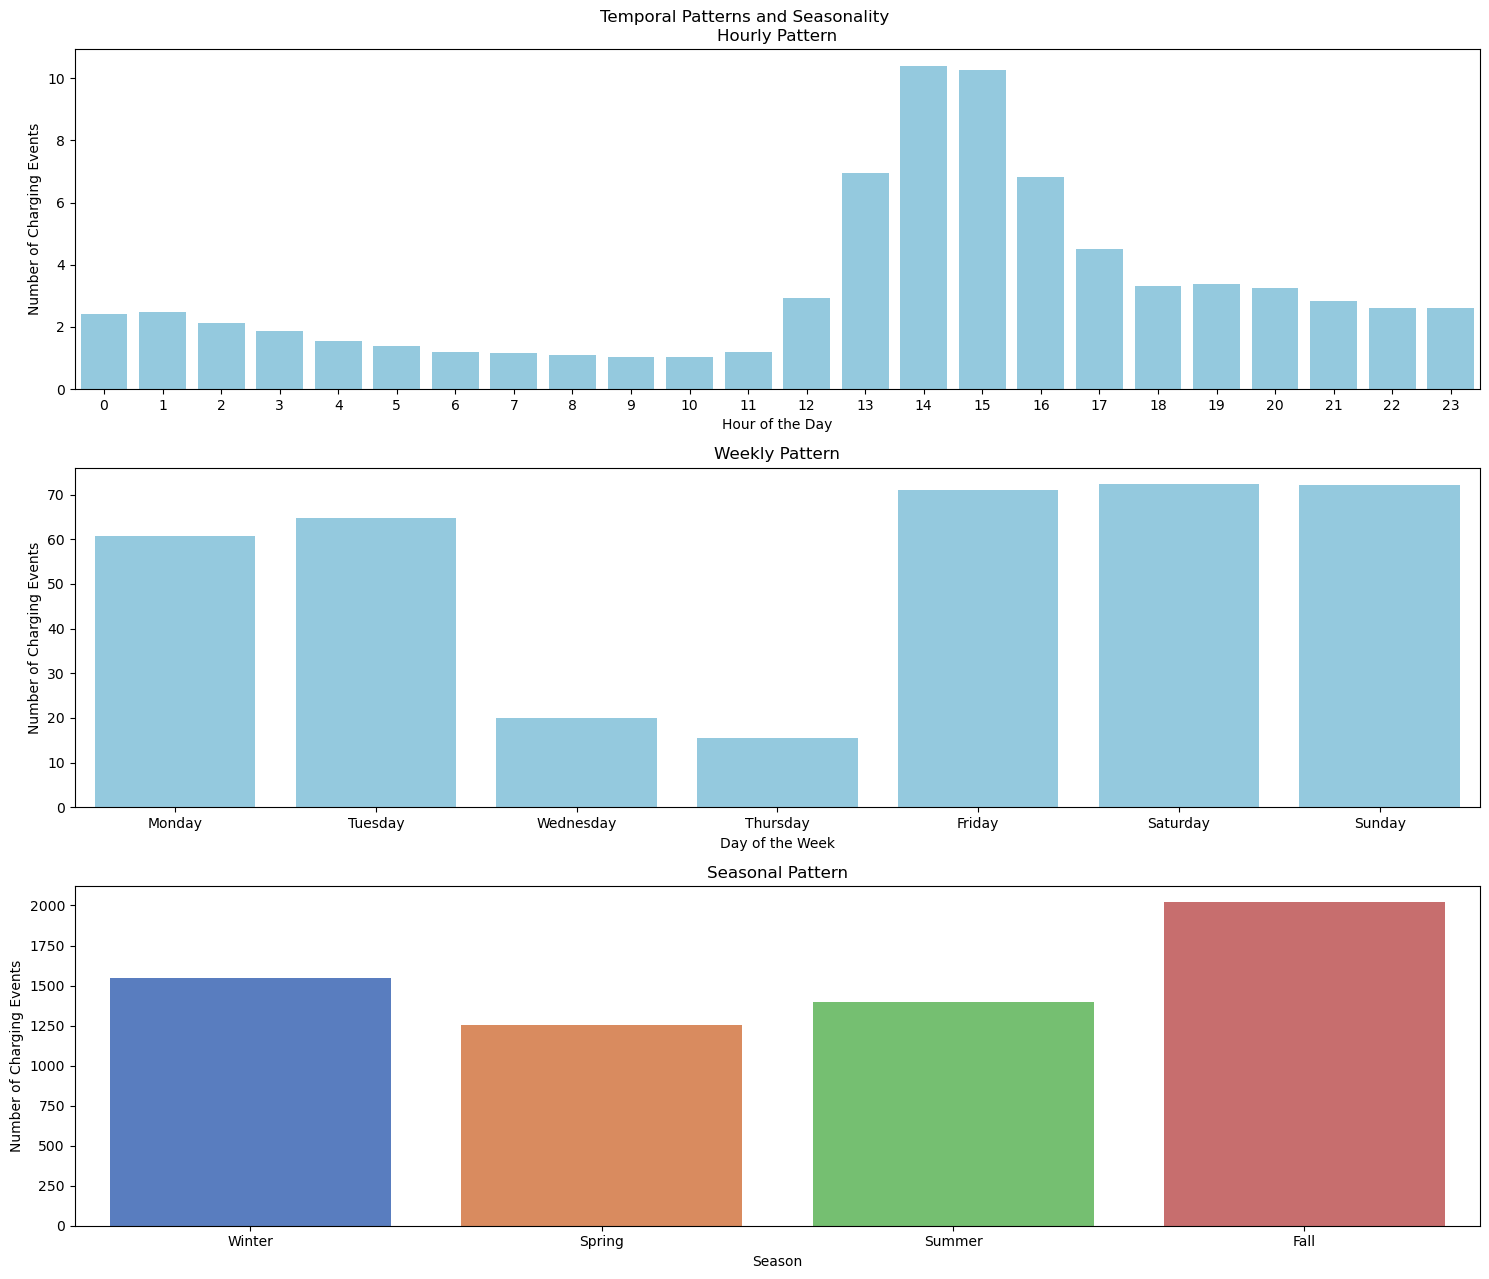

In [ ]:
import calendar

fig, axis = plt.subplots(3, 1, figsize=(15, 13))
fig.suptitle("Temporal Patterns and Seasonality")

merged_df['hour'] = merged_df['connectionTime'].dt.hour

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
merged_df['season'] = merged_df['connectionTime'].dt.month.apply(get_season)


#Hourly Pattern

anzahl=merged_df[["connectionTime"]]
anzahl["connectionTime"]=anzahl["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
anzahl["count_hour"]=1
anzahl=anzahl.groupby(["connectionTime"], as_index=False).sum()
anzahl["connectionTime"]=anzahl["connectionTime"].dt.hour
anzahl["count_days"]=1
anzahl=anzahl.groupby(["connectionTime"], as_index=False).sum()
anzahl["average_per_hour"]= anzahl["count_hour"]/ anzahl["count_days"]
print(anzahl["average_per_hour"].sum())

axis[0].set_title("Hourly Pattern")
sns.barplot(x=anzahl["connectionTime"], y=anzahl["average_per_hour"], ax=axis[0], color='skyblue')
axis[0].set_xlabel('Hour of the Day')
axis[0].set_ylabel('Number of Charging Events')


#Weekly Pattern

merged_df['weekday'] = merged_df['connectionTime'].dt.day_name()

anzahl_week=merged_df[["connectionTime"]]
anzahl_week["connectionTime"]=anzahl_week["connectionTime"].apply(lambda x: x.replace(second=0, minute=0, hour=0))
anzahl_week["count_hour"]=1
anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).sum()
anzahl_week["connectionTime"]=anzahl_week["connectionTime"].dt.day_name()
anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).mean()
#anzahl_week["count_days"]=1
#anzahl_week=anzahl_week.groupby(["connectionTime"], as_index=False).sum()
#anzahl_week["average_per_weekday"]= anzahl_week["count_hour"]/ anzahl_week["count_days"]


axis[1].set_title("Weekly Pattern")
sns.barplot(x=anzahl_week['connectionTime'], y=anzahl_week['count_hour'], ax=axis[1], color='skyblue')
axis[1].set_xticklabels([calendar.day_name[d] for d in range(7)])  # Convert day of week to day name
axis[1].set_xlabel('Day of the Week')
axis[1].set_ylabel('Number of Charging Events')

#Seasonal Pattern
anzahl_season=merged_df[["connectionTime"]]
anzahl_season["connectionTime"]=anzahl_season["connectionTime"].apply(lambda x: x.replace(second=0, minute=0, hour=0, day=1))
anzahl_season["count_hour"]=1
anzahl_season=anzahl_season.groupby(["connectionTime"], as_index=False).sum()
anzahl_season["connectionTime"]=anzahl_season['connectionTime'].dt.month.apply(get_season)
anzahl_season["count_days"]=1
anzahl_season=anzahl_season.groupby(["connectionTime"], as_index=False).sum()
anzahl_season["average_per_season"]= anzahl_season["count_hour"]/ anzahl_season["count_days"]


axis[2].set_title("Seasonal Pattern")
sns.barplot(x=anzahl_season['connectionTime'], y=anzahl_season["average_per_season"], ax=axis[2], order=['Winter', 'Spring', 'Summer', 'Fall'], palette='muted')
axis[2].set_xlabel('Season')
axis[2].set_ylabel('Number of Charging Events')

plt.tight_layout()
plt.show()

### Patterns

#### Daily
The peak number of charging sessions occur at 14 -> After Lunchbreak?
Generally morge charging events in the afternoon -> After work?
Lowest amount of charging events 0 - 12 -> people sleep at home and use their own charging station
#### Weekly
high use between Monday and Friday -> working days, connect charging with way to work, use car as transport to work -> need of charging
peak on Tuesday -> begin of the week, Office day
Monday & Friday lower compared to other working days -> Home Office days?, free for parttime workers?, no need for/at weekend
lowest level Saturday and Sunday: not in the city for working/ no long distances

#### Seasonal
more in summer: car trip to vacation location? generally more activities in summer

## b) Key Performance Indicators (KPIs):

* kWh delivered per hour
* Hourly number of cars on the station
* Average time without charging
* utilization of charging station in percentage

### kWh delivered per hour

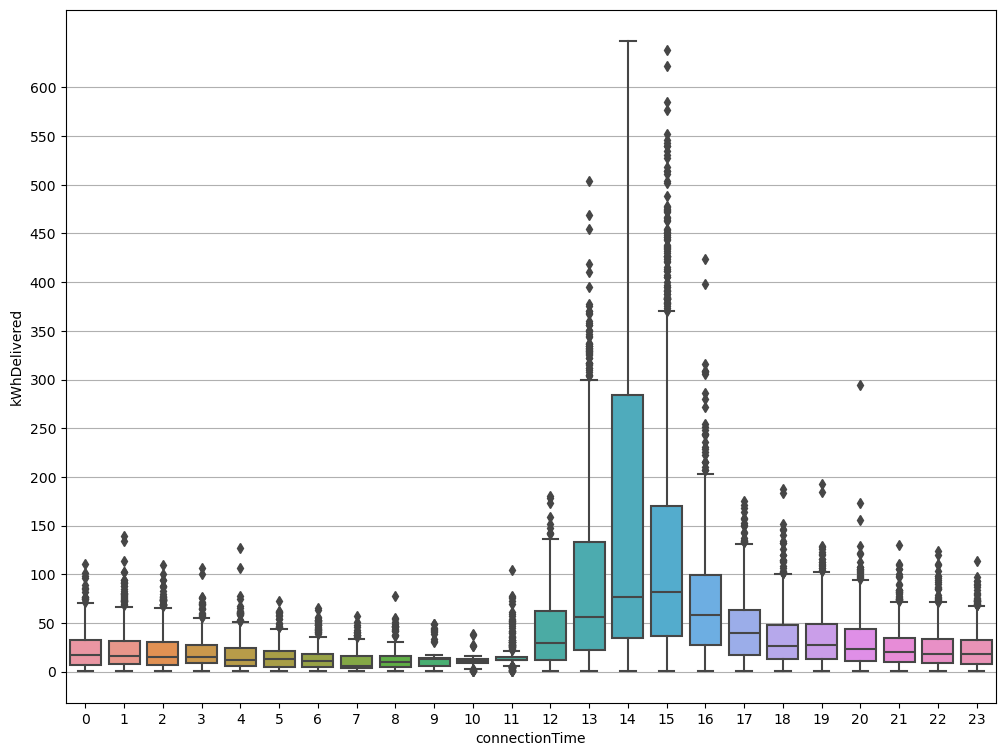

In [ ]:
hourly_kWh=merged_df[["connectionTime", "kWhDelivered"]]
hourly_kWh["connectionTime"]=hourly_kWh["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
hourly_kWh=hourly_kWh.groupby(["connectionTime"], as_index=False).sum()
hourly_kWh["count"]=1
hourly_kWh["connectionTime"]=hourly_kWh["connectionTime"].dt.hour

plt.figure(figsize=(12, 9))
plt.grid()
plt.gca().set_axisbelow(True)
sns.boxplot(data=hourly_kWh, x="connectionTime", y="kWhDelivered")
plt.yticks(np.arange(min(hourly_kWh["kWhDelivered"]-0.5), max(hourly_kWh["kWhDelivered"])+1, 50))

plt.show()

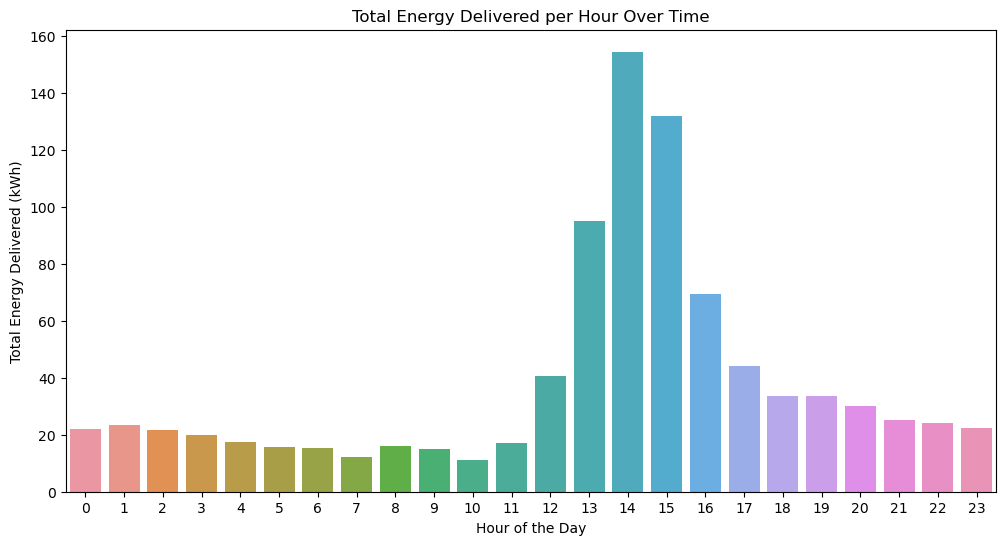

In [ ]:
#Calculate average Energy Delivered per Hour
hourly_kWh=hourly_kWh.groupby(["connectionTime"], as_index=False).sum()
hourly_kWh["hourly_kWh"]=hourly_kWh["kWhDelivered"]/ hourly_kWh["count"]

#Visualize Energy Delivered per Hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_kWh, x="connectionTime", y="hourly_kWh")
plt.title('Total Energy Delivered per Hour Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Energy Delivered (kWh)')
plt.xticks(range(24))
plt.show()

### Hourly number of cars at the station

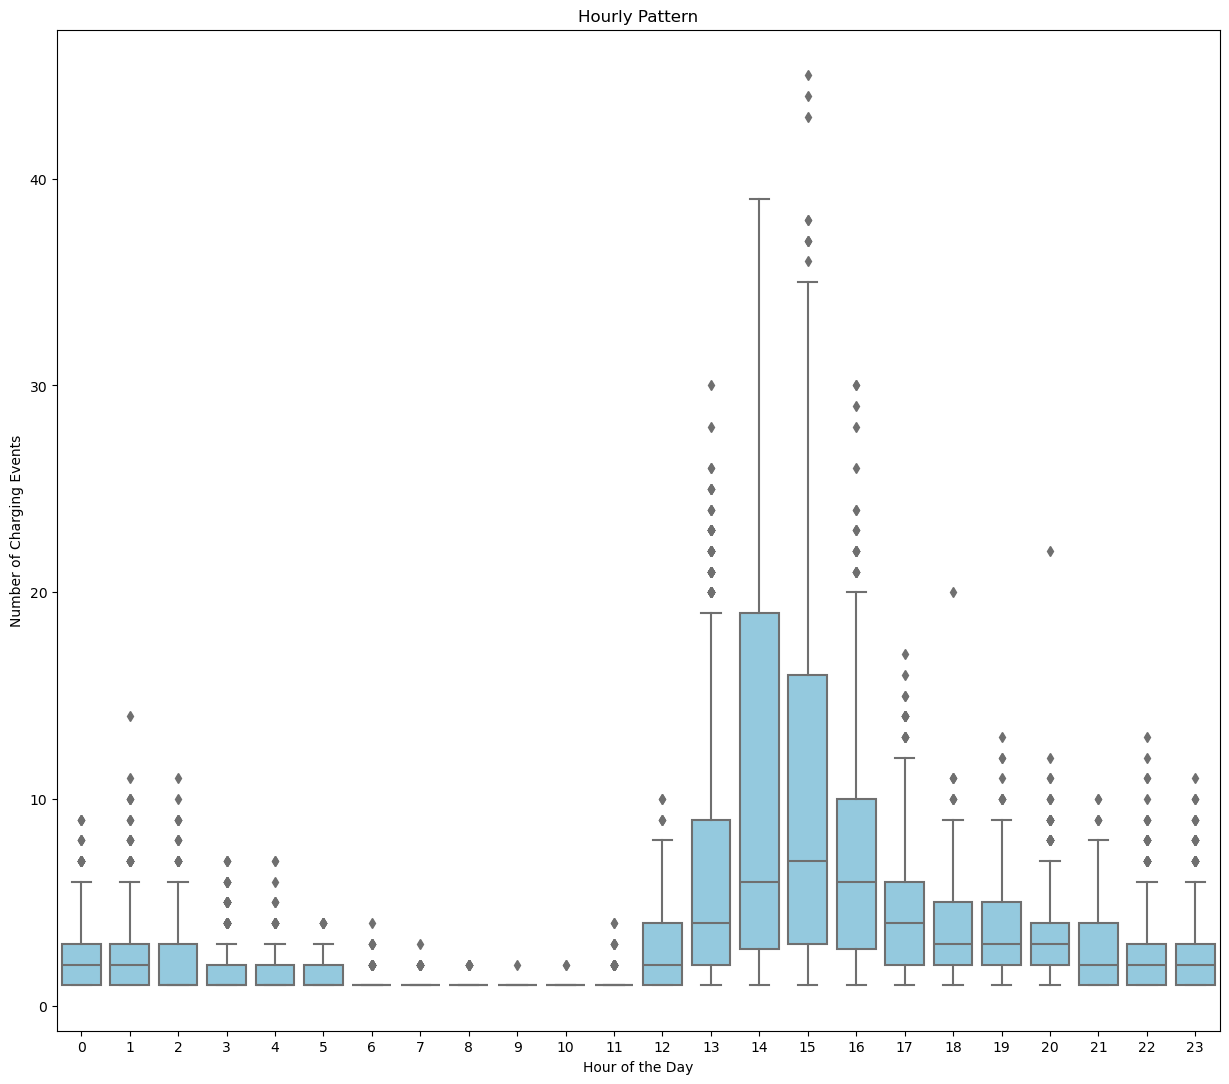

In [ ]:
plt.figure(figsize=(15, 13))
anzahl_boxplot=merged_df[["connectionTime"]]
anzahl_boxplot["connectionTime"]=anzahl_boxplot["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
anzahl_boxplot["count_hour"]=1
anzahl_boxplot=anzahl_boxplot.groupby(["connectionTime"], as_index=False).sum()
anzahl_boxplot["connectionTime"]=anzahl_boxplot["connectionTime"].dt.hour

sns.boxplot(data=anzahl_boxplot, x="connectionTime", y="count_hour", color='skyblue')
plt.title("Hourly Pattern")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Events')
plt.show()

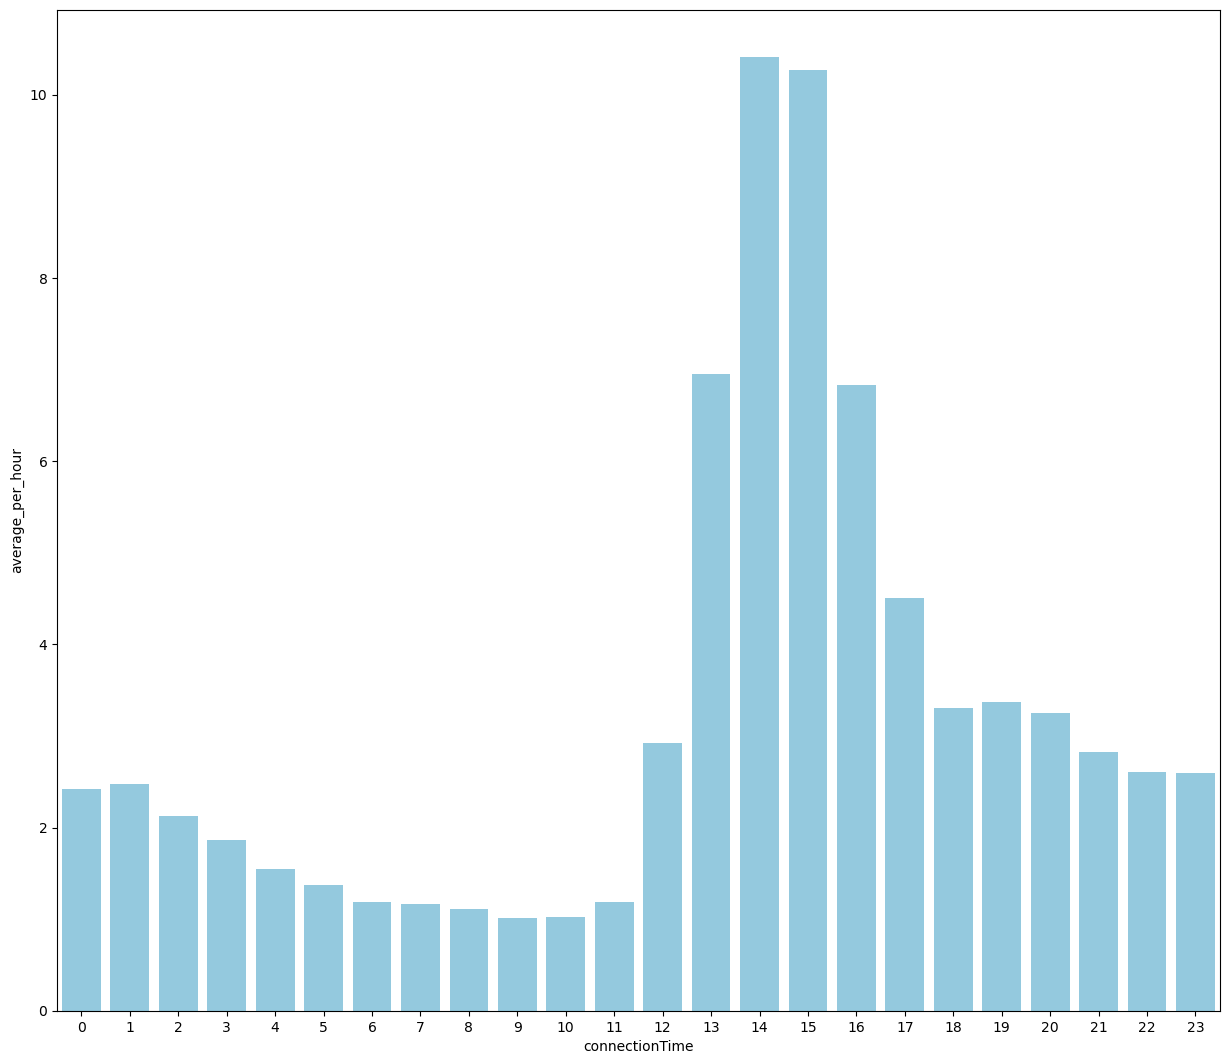

In [ ]:
plt.figure(figsize=(15, 13))
sns.barplot(x=anzahl["connectionTime"], y=anzahl["average_per_hour"], color='skyblue')
plt.show()

## Average time without charging

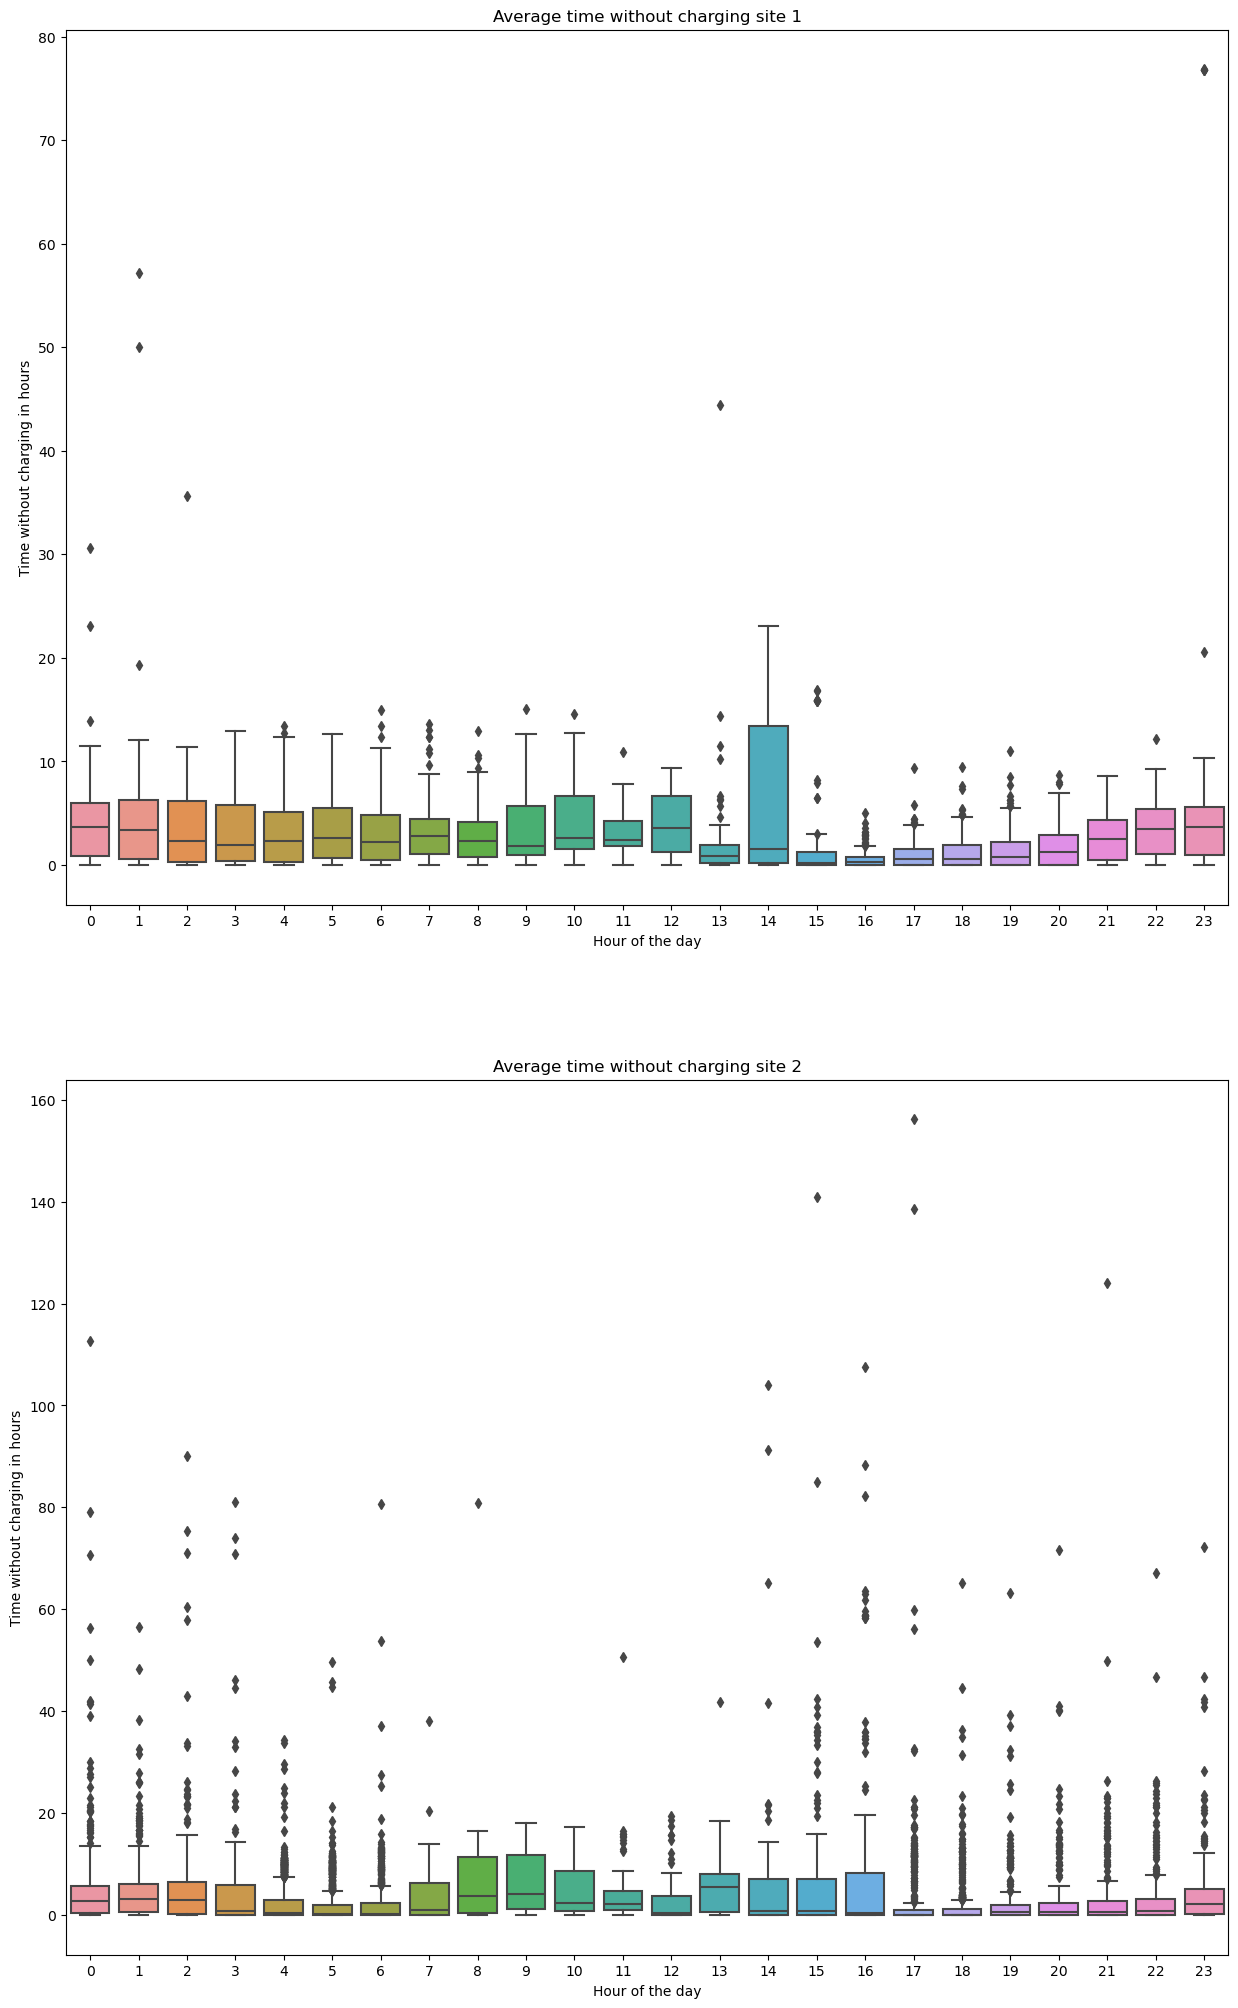

In [ ]:
df_site1=merged_df[merged_df["siteID"]==1]
df_site2=merged_df[merged_df["siteID"]==2]

df_site1["twc"]=(df_site1["disconnectTime"]-df_site1["doneChargingTime"]).dt.total_seconds() / 3600
df_site2["twc"]=(df_site2["disconnectTime"]-df_site2["doneChargingTime"]).dt.total_seconds() / 3600

df_site1=df_site1[["twc", "disconnectTime"]]
df_site2=df_site2[["twc", "disconnectTime"]]

df_site1["disconnectTime"]=df_site1["disconnectTime"].dt.hour
df_site2["disconnectTime"]=df_site2["disconnectTime"].dt.hour


fig, axis = plt.subplots(2, 1, figsize=(15, 25))

axis[0].set_title("Average time without charging site 1")
sns.boxplot(x=df_site1["disconnectTime"], y=df_site1["twc"], ax=axis[0])
axis[0].set_xlabel("Hour of the day")
axis[0].set_ylabel("Time without charging in hours")

axis[1].set_title("Average time without charging site 2")
sns.boxplot(x=df_site2["disconnectTime"], y=df_site2["twc"], ax=axis[1])
axis[1].set_xlabel("Hour of the day")
axis[1].set_ylabel("Time without charging in hours")

plt.show()

## Utilization of charging station in percentage

<Axes: xlabel='connectionTime', ylabel='stationID'>

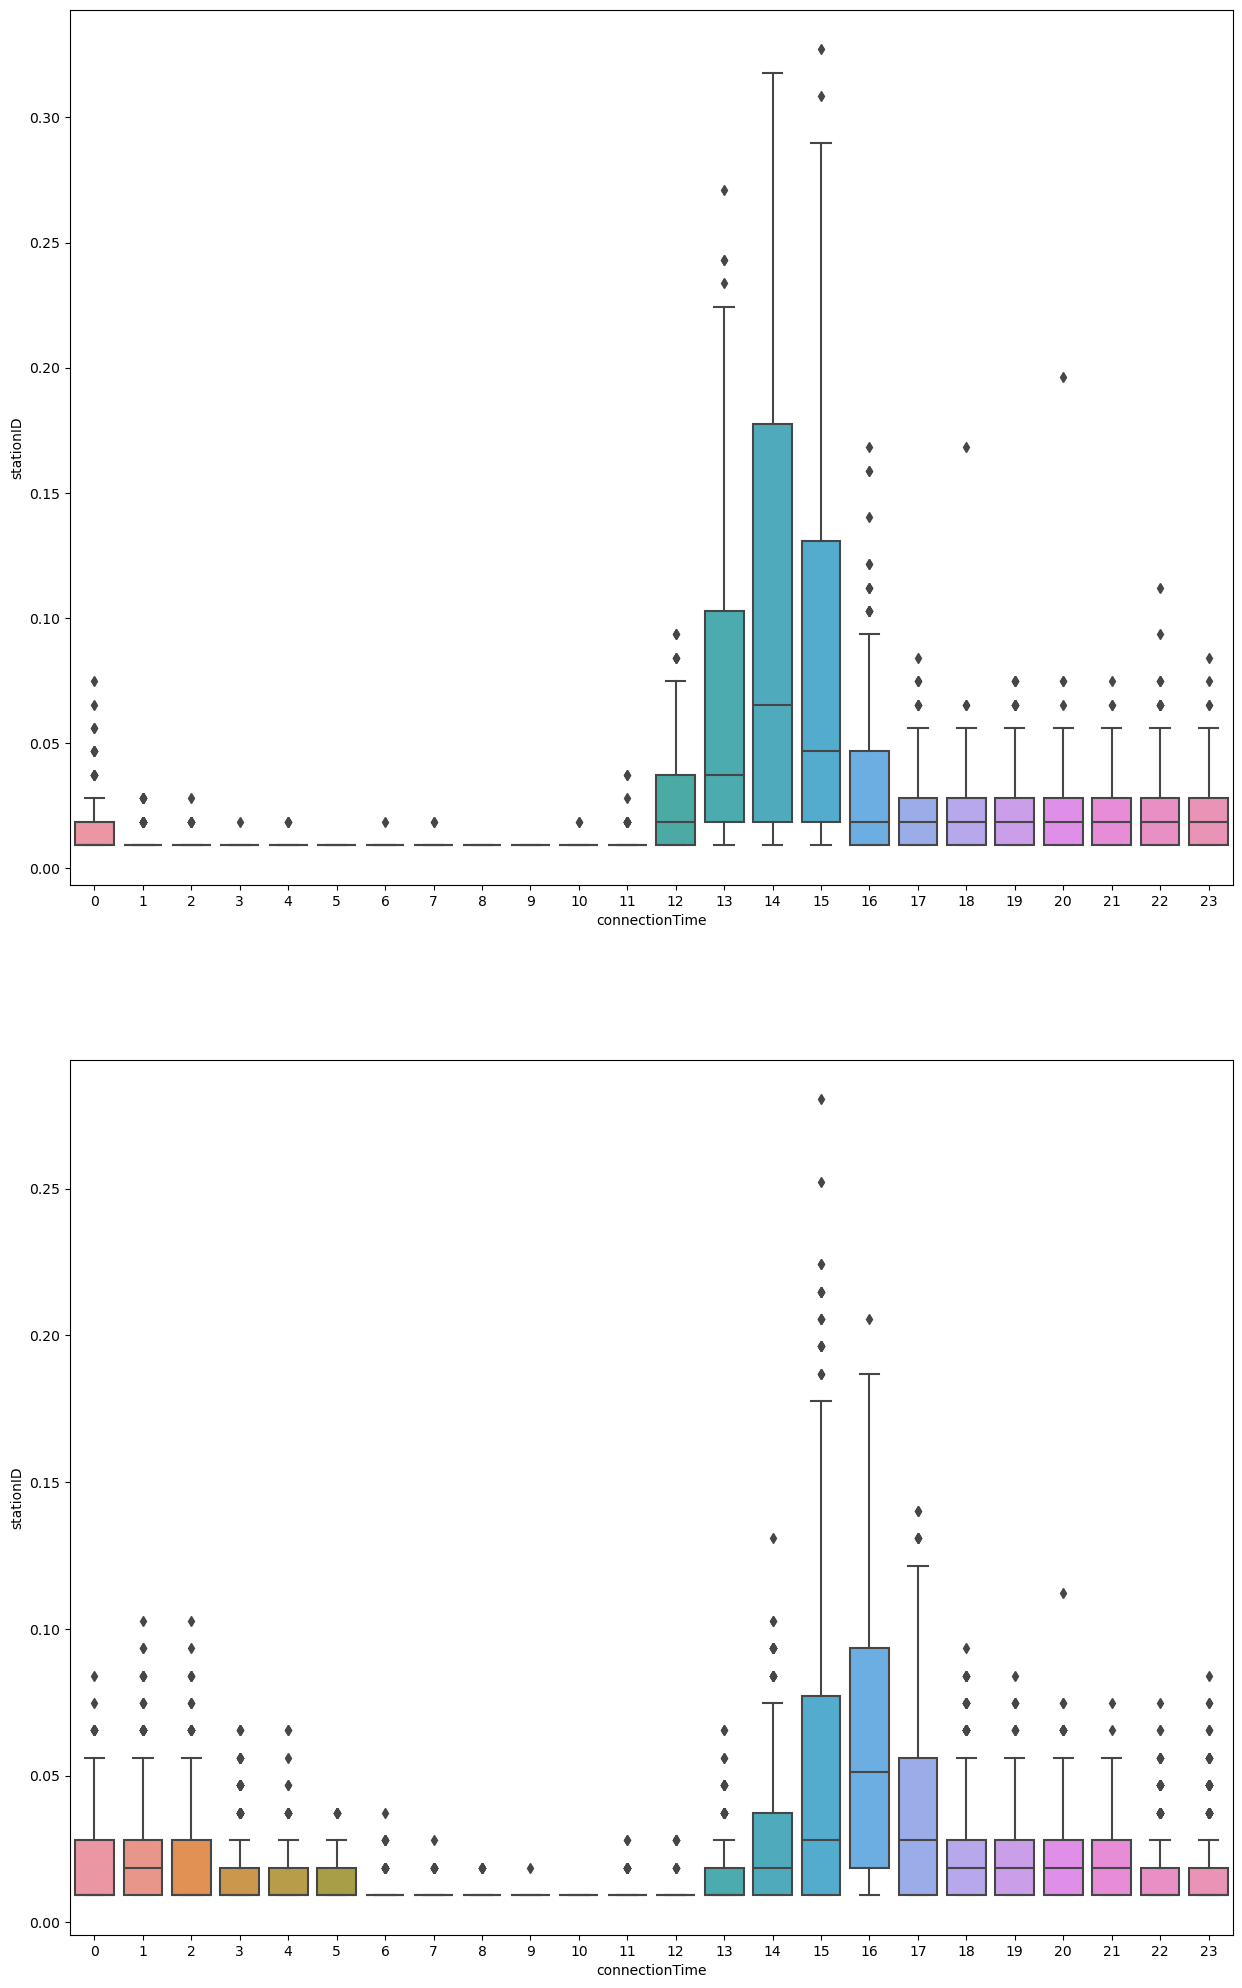

In [ ]:
Util_site1=merged_df[merged_df["siteID"]==1]
Util_site2=merged_df[merged_df["siteID"]==2]


Util_site1=Util_site1[["stationID", "connectionTime"]]
Util_site2=Util_site2[["stationID", "connectionTime"]]

Util_site1["connectionTime"]=Util_site1["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))
Util_site2["connectionTime"]=Util_site2["connectionTime"].apply(lambda x: x.replace(second=0, minute=0))


df_site1.drop_duplicates(inplace=True)
df_site2.drop_duplicates(inplace=True)

Util_site1=Util_site1.groupby(["connectionTime"], as_index=False).count()
Util_site2=Util_site2.groupby(["connectionTime"], as_index=False).count()

Util_site1["connectionTime"]=Util_site1["connectionTime"].dt.hour
Util_site2["connectionTime"]=Util_site2["connectionTime"].dt.hour

number=len(np.unique(merged_df["stationID"]))

Util_site1["stationID"]=Util_site1["stationID"]/number
Util_site2["stationID"]=Util_site2["stationID"]/number

fig, axis = plt.subplots(2, 1, figsize=(15, 25))

sns.boxplot(x=Util_site1["connectionTime"], y=Util_site1["stationID"], ax=axis[0])
sns.boxplot(x=Util_site2["connectionTime"], y=Util_site2["stationID"], ax=axis[1])

## Average Charging Duration per Hour of the Day 

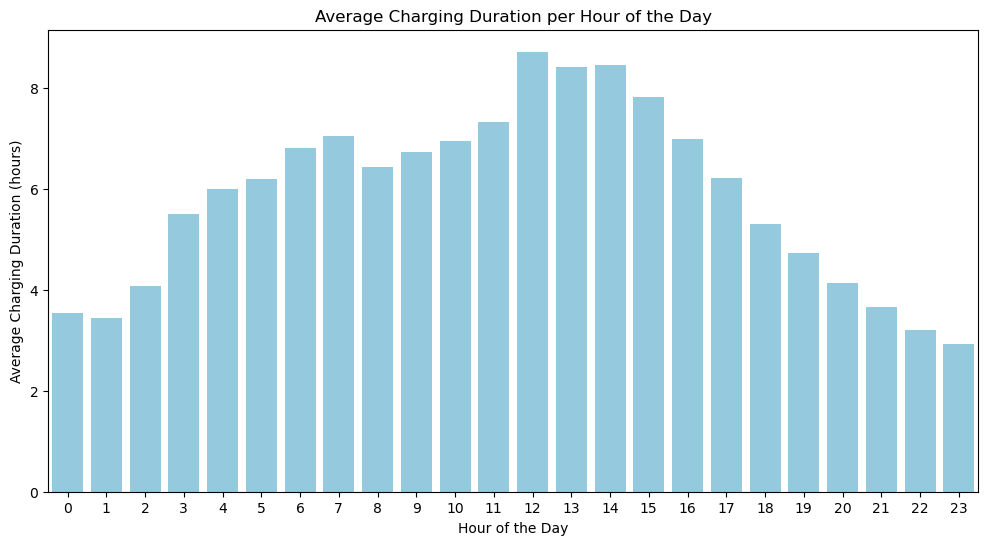

In [ ]:
#Utilization rate: (average charging duration of sessions over the day)
#Calculate charging duration in hours
merged_df['charging_duration'] = (merged_df['disconnectTime'] - merged_df['connectionTime']).dt.total_seconds() / 3600

#Extract hour from 'connectionTime'
merged_df['hour'] = merged_df['connectionTime'].dt.hour

#Group by hour and calculate the average charging duration
average_charging_duration_per_hour = merged_df.groupby('hour')['charging_duration'].mean()

#Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_charging_duration_per_hour.index, y=average_charging_duration_per_hour.values, color='skyblue')
plt.title('Average Charging Duration per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Charging Duration (hours)')
plt.show()

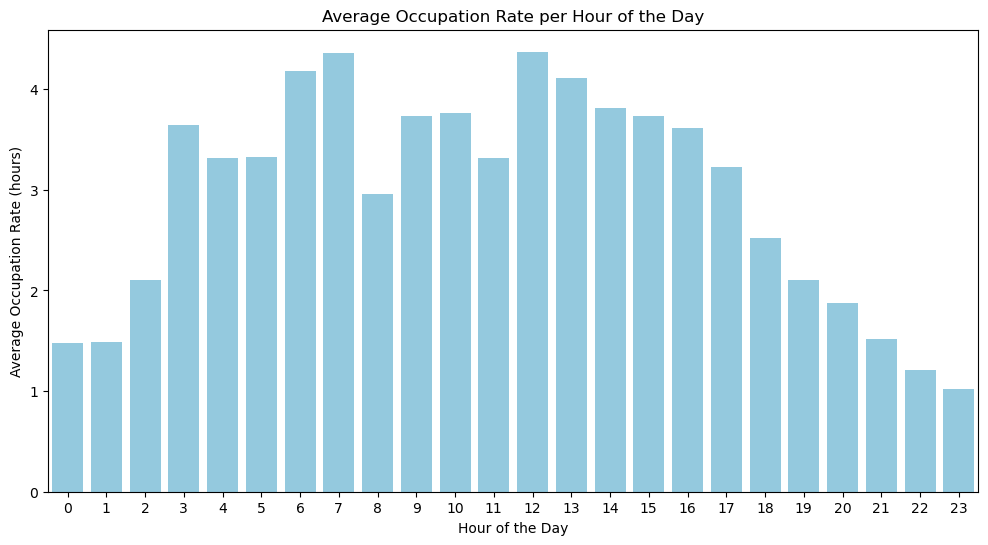

In [ ]:
#Occupation Rate (how long do cars stay connected, even though they are done charging
#Calculate occupation rate in hours (exclude negative values)
merged_df['occupation_rate'] = (merged_df['disconnectTime'] - merged_df['doneChargingTime']).dt.total_seconds() / 3600
merged_df.loc[merged_df['occupation_rate'] < 0, 'occupation_rate'] = 0  # Replace negative values with 0

#Extract hour from 'connectionTime'
merged_df['hour'] = merged_df['connectionTime'].dt.hour

#Group by hour and calculate the average occupation rate
average_occupation_rate_per_hour = merged_df.groupby('hour')['occupation_rate'].mean()

#Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_occupation_rate_per_hour.index, y=average_occupation_rate_per_hour.values, color='skyblue')
plt.title('Average Occupation Rate per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Occupation Rate (hours)')
plt.show()

## c) Site Characteristics:

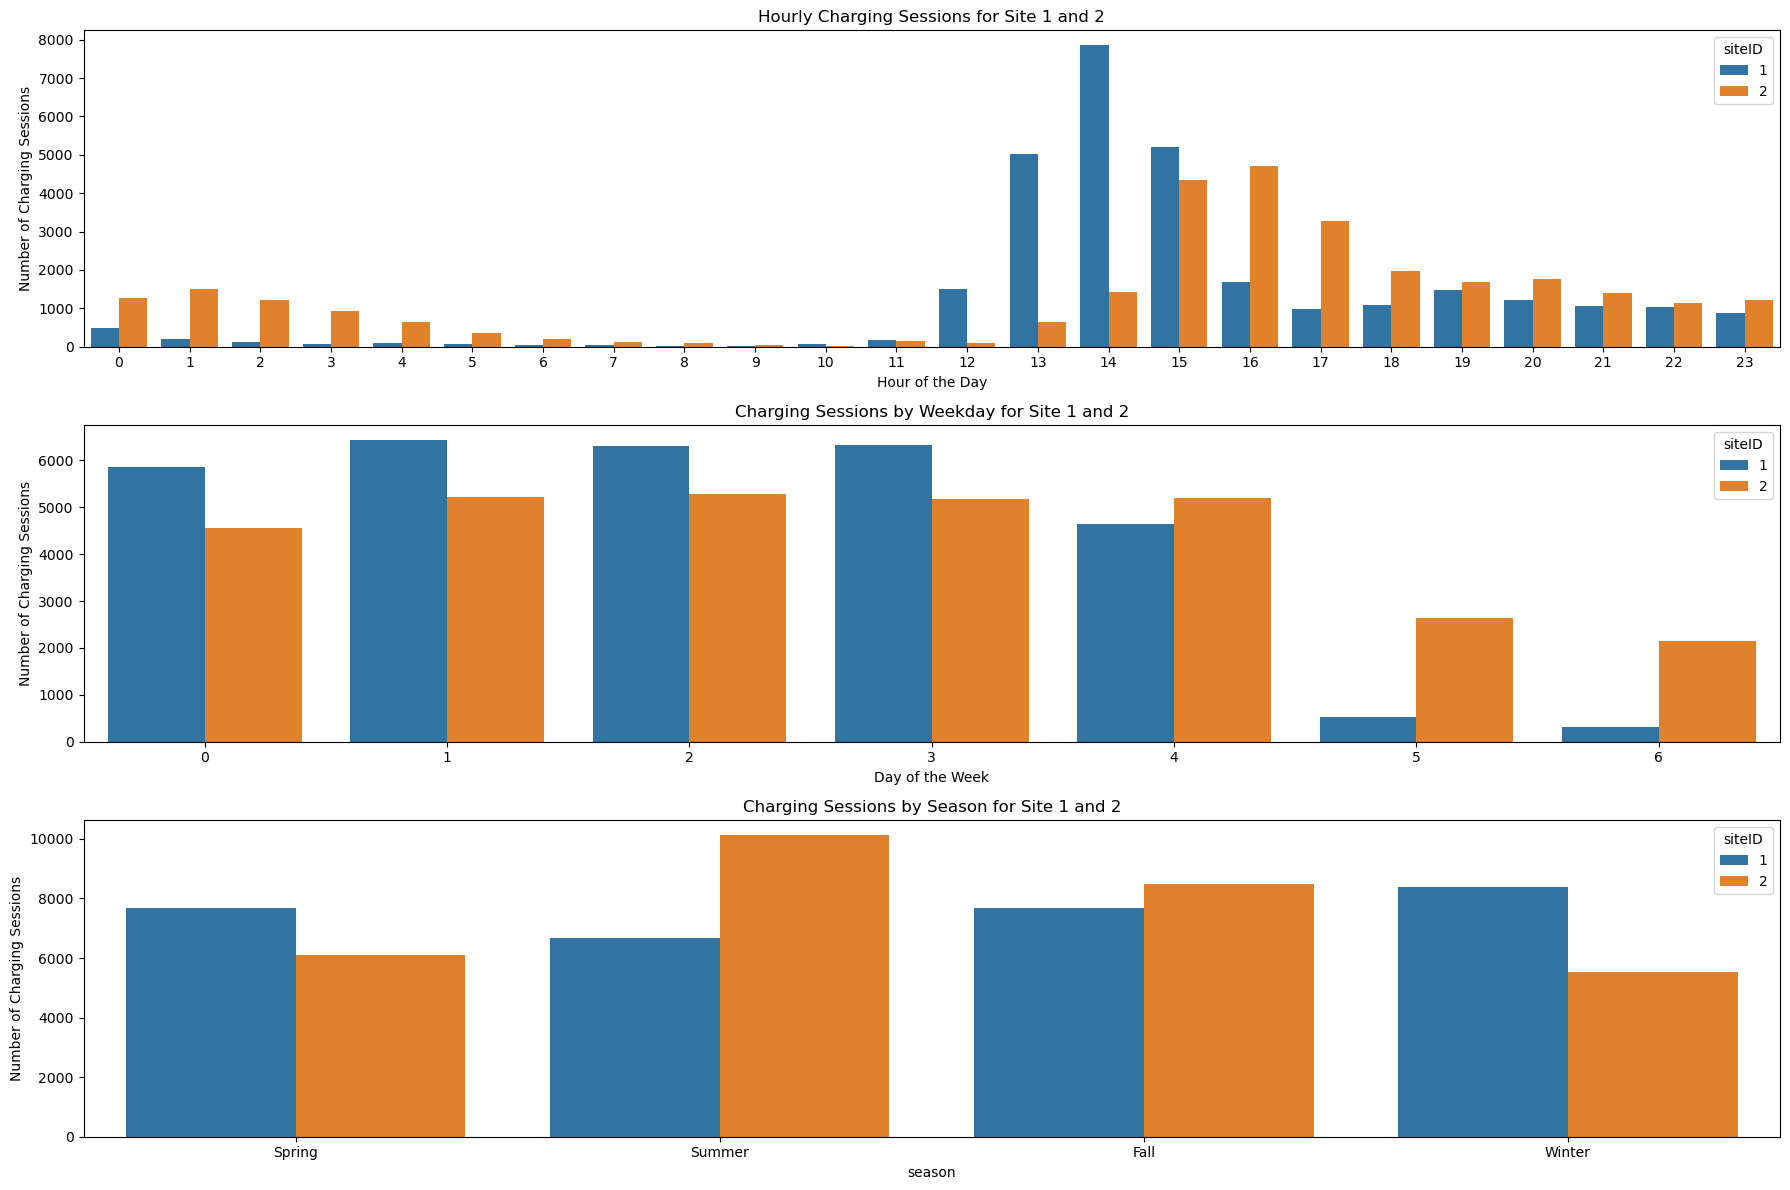

In [ ]:
merged_df["siteID"] = merged_df["siteID"].astype(str)

#Create a bar plot for hours
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.countplot(x='hour', data=merged_df, hue="siteID", hue_order=["1", "2"])
plt.title('Hourly Charging Sessions for Site 1 and 2')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')

#Create a bar plot for weekdays
plt.subplot(3, 1, 2)
sns.countplot(x=merged_df['connectionTime'].dt.dayofweek, data=merged_df,  hue="siteID", hue_order=["1", "2"])
plt.title('Charging Sessions by Weekday for Site 1 and 2')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Charging Sessions')

#Create a bar plot for seasons
plt.subplot(3, 1, 3)
sns.countplot(x='season', data=merged_df,  hue="siteID", hue_order=["1", "2"])
plt.title('Charging Sessions by Season for Site 1 and 2')
plt.xlabel('season')
plt.ylabel('Number of Charging Sessions')

plt.tight_layout()
plt.show()

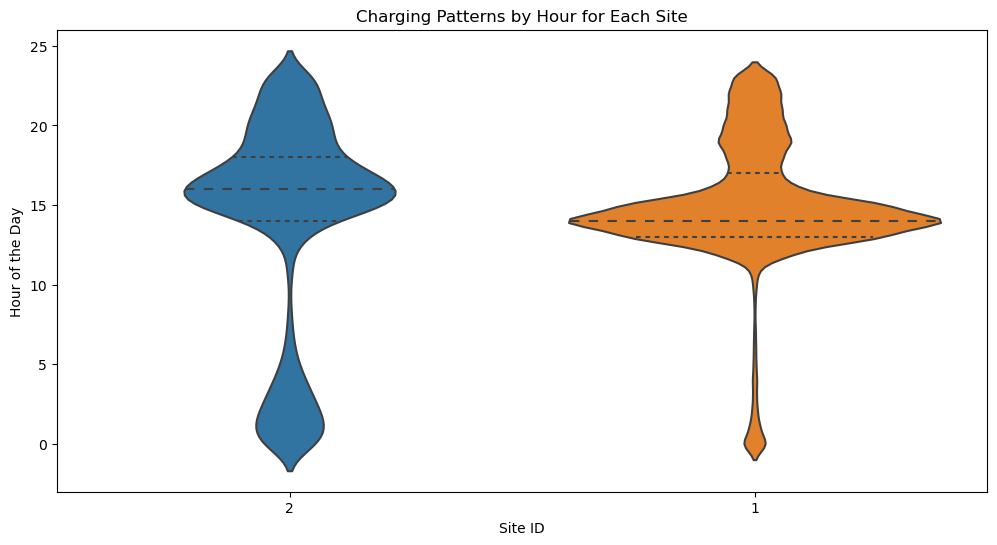

In [ ]:
#At which hour did they charge:

#Create a violin plot:
#the width of the plot at each hour represents the density of charging events during that specific hour
plt.figure(figsize=(12, 6))
sns.violinplot(x='siteID', y='hour', data=merged_df, inner='quartile')
plt.title('Charging Patterns by Hour for Each Site')
plt.xlabel('Site ID')
plt.ylabel('Hour of the Day')
plt.show()

## Evaluation:

### Hourly Charging Sessions:
- **Site 1** has the highest charging sessions **around midday** (12PM to 3PM). 
    - could be indicative of a **private charging** site where people charge their vehicles during working hours
- **Site 2** experiences high charging sessions during **late afternoon to early evening** (3PM to 6PM).
    - students probably wont have the financial means to buy the expensive electric vehicles, leaving the public university sites mostly unused during the typical 'working hours' in which students visit the university (7AM to 2PM)
    - as soon as full-time working employees (who have the financial resources to buy electric vehicles) come back from their workplaces in the late afternoon, they may begin charging at the public site until the next morning
    - these observations indicate Site 2 to be the **public site**

### Charging Sessions by Weekday:
- Both **Site 1** and **Site 2** show a relatively even distribution of charging sessions across weekdays (Monday to Friday).
- However, **Site 2** still has relatively **high charging sessions on the weekend** while Site 1 has significantly less during this time
    - since **employees typically don't work on the weekends**, they also dont have the chance to charge their vehicle at the companys charging sites. it therefore indicates that **Site 1** is the **private charging site**
    - **Site 2** on the other hand still has **high charging sessions on the weekend**, meaning that its usage is not constrained by any factors as much. This indicates that it is the constantly accessible **public charging site** 

### Charging Sessions by Season:
- Both sites show similar seasonal patterns.
- However, **Site 2** has **more charging sessions during the Summer**. 
- The reason for the difference might be that **Summer is the most popular vacation season**, leading to the **abscence of many employees** during this time. This means that less employees can charge their electric vehicles which would be consistent with the hypothesis that **Site 1** is the **private site**.

### Hypothesis:
 - **Site 1** = private charging site
 - **Site 2** = public charging site

## 2.1 Insights from data description